# Задачи к Лекции 5

Дан файл "Anuran_Calls_(MFCCs).zip", в котором содержится обработка звуков издаваемых различными видами лягушек. В качестве признаков выступают мел-кепстральные коэффициенты __[MFCC](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)__

**Чтение данных**

In [1]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

z = zipfile.ZipFile(r"C:\Users\Kirill\OneDrive\Desktop\study\Технологии автоматической обработки текста\lecture 4\Anuran_Calls_(MFCCs).zip")
df = pd.read_csv(z.open("Frogs_MFCCs.csv"))

df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [2]:
df.loc[:,"MFCCs_ 1": "MFCCs_ 2"]

,MFCCs_ 1,MFCCs_ 2
0,1.0,0.152936
1,1.0,0.171534
2,1.0,0.152317
3,1.0,0.224392
4,1.0,0.087817
...,...,...
7190,1.0,-0.554504
7191,1.0,-0.517273
7192,1.0,-0.582557
7193,1.0,-0.519497


**Получение различной информации**

In [3]:
df.shape

(7195, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [5]:
df.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


**1. Нормализовать данные**

In [ ]:
X = df.iloc[:, :22]
X_np = X.values

mean = X_np.mean(axis=0)
std = X_np.std(axis=0)

X_normalized_np = (X_np - mean) / std

X_normalized = pd.DataFrame(X_normalized_np, columns=X.columns)

df_normalized = pd.concat([X_normalized, df.iloc[:, 22:]], axis=1)

df_normalized.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430,Leptodactylidae,Adenomera,AdenomeraAndre,1


**2. Построить бинарный классификатор для каждого семейства(Family) на основе LogisticRegression c $l_1$ и $l_2$ регуляризацими. Это соответствует целевым исходам (Конкретное семейство, Всё остальное). Подобрать гиперпараметр $C$ с помощью кросс-валидации, используя метрику ROC AUC.**

In [10]:
# Your code here
# Выделяем признаки и целевую переменную
X = df.iloc[:, :22]     # MFCC_1 ... MFCC_22
y_family = df['Family']  # Семейства

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize

# Получаем список всех семейств
families = y_family.unique()

# Хранилище результатов
results = []

# Настройки кросс-валидации
cv = StratifiedKFold(n_splits=5)

# Обучаем по одному классификатору на каждом семействе
for family in families:
    print(f"Обучение бинарного классификатора для семейства: {family}")
    
    # Преобразуем в бинарную задачу
    y_binary = (y_family == family).astype(int)

    # Создаем pipeline
    pipe = Pipeline([
        ('clf', LogisticRegression(solver='liblinear', max_iter=1000))
    ])

    # Пространство параметров
    param_grid = {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': np.logspace(-4, 4, 9)  # C от 0.0001 до 10000
    }

    # Поиск наилучших параметров через кросс-валидацию
    grid_search = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)
    grid_search.fit(X_normalized, y_binary)

    # Сохраняем результаты
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results.append({
        'Family': family,
        'Best_Params': best_params,
        'Best_ROC_AUC': best_score
    })

# Выводим результаты
results_df = pd.DataFrame(results)
print("\nРезультаты кросс-валидации:")
print(results_df[['Family', 'Best_Params', 'Best_ROC_AUC']])

Обучение бинарного классификатора для семейства: Leptodactylidae
Обучение бинарного классификатора для семейства: Dendrobatidae
Обучение бинарного классификатора для семейства: Hylidae
Обучение бинарного классификатора для семейства: Bufonidae

Результаты кросс-валидации:
            Family                               Best_Params  Best_ROC_AUC
0  Leptodactylidae   {'clf__C': 0.001, 'clf__penalty': 'l2'}      0.916515
1    Dendrobatidae    {'clf__C': 0.01, 'clf__penalty': 'l1'}      0.949825
2          Hylidae  {'clf__C': 1000.0, 'clf__penalty': 'l1'}      0.888940
3        Bufonidae  {'clf__C': 1000.0, 'clf__penalty': 'l1'}      0.856626


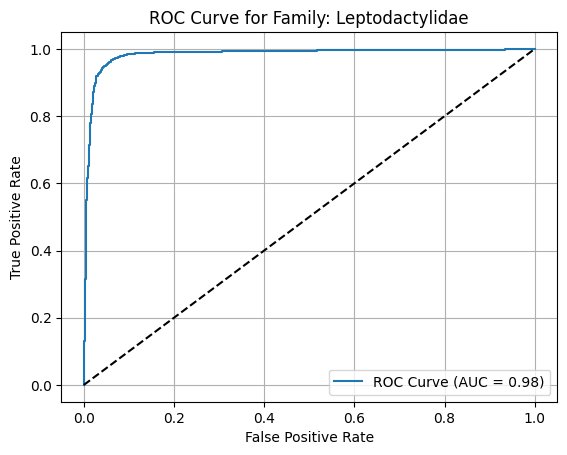

In [11]:
from sklearn.metrics import roc_curve

# Обучаем модель для одного семейства
family = families[0]
y_binary = (y_family == family).astype(int)

model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)
model.fit(X_normalized, y_binary)

# Предсказания вероятностей
y_proba = model.predict_proba(X_normalized)[:, 1]

# ROC кривая
fpr, tpr, _ = roc_curve(y_binary, y_proba)

# Построение графика
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_binary, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Family: {family}')
plt.legend()
plt.grid()
plt.show()


**3. Добавить полиномиальные признаки до второго порядка. Построить бинарный классификатор для каждого семейства на основе LogisticRegression c $l_1$ и $l_2$ регуляризацими. Подобрать гиперпараметр $C$ с помощью кросс-валидации, используя метрику ROC AUC.**

In [12]:
# Your code here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score

# Генерация полиномиальных признаков второго порядка
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_normalized)

# Получаем список уникальных семейств
families = y_family.unique()

# Хранение результатов
results_poly = []

# Настройки кросс-валидации
cv = StratifiedKFold(n_splits=5)

# Обучение бинарного классификатора для каждого семейства
for family in families:
    print(f"\nОбучение для семейства: {family}")
    
    # Бинаризуем целевую переменную
    y_binary = (y_family == family).astype(int)

    # Создаем pipeline: нормализация + логистическая регрессия
    pipe = Pipeline([
        ('clf', LogisticRegression(solver='liblinear', max_iter=1000))
    ])

    # Пространство параметров
    param_grid = {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': np.logspace(-4, 4, 5)  # C от 0.0001 до 10000
    }

    # Поиск лучших параметров с помощью кросс-валидации
    grid_search = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)
    grid_search.fit(X_poly, y_binary)

    # Сохраняем результаты
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results_poly.append({
        'Family': family,
        'Best_Params': best_params,
        'Best_ROC_AUC_with_Poly': best_score
    })

# Вывод результатов
results_poly_df = pd.DataFrame(results_poly)
print("\nРезультаты с полиномиальными признаками:")
print(results_poly_df[['Family', 'Best_Params', 'Best_ROC_AUC_with_Poly']])



Обучение для семейства: Leptodactylidae

Обучение для семейства: Dendrobatidae

Обучение для семейства: Hylidae

Обучение для семейства: Bufonidae

Результаты с полиномиальными признаками:
            Family                               Best_Params  \
0  Leptodactylidae  {'clf__C': 0.0001, 'clf__penalty': 'l2'}   
1    Dendrobatidae     {'clf__C': 1.0, 'clf__penalty': 'l1'}   
2          Hylidae  {'clf__C': 0.0001, 'clf__penalty': 'l2'}   
3        Bufonidae     {'clf__C': 1.0, 'clf__penalty': 'l1'}   

   Best_ROC_AUC_with_Poly  
0                0.904122  
1                0.974131  
2                0.890248  
3                0.880159  
